In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iliya_pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df_resume = pd.read_csv('../DataSet/Role-Resume-Dataset.csv')
df_jobs = pd.read_csv('../DataSet/Job-Description-Dataset.csv')

In [5]:
df_resume.head()

Unnamed: 0         job_title  \
0           0  Business Analyst   
1           1  Business Analyst   
2           2  Business Analyst   
3           3  Business Analyst   
4           4  Business Analyst   

                                              resume  
0  Proficient in Content Marketing, Budget Manage...  
1  Proficient in Brand Strategy, SEO, Budget Mana...  
2  Proficient in Forecasting, Budgeting, Market R...  
3  Proficient in Supply Chain Optimization, Vendo...  
4  Proficient in Budgeting, Logistics, Procuremen...

In [6]:
df_jobs.head()

Unnamed: 0     Experience Qualifications Salary Range             Country  \
0           0  1 to 15 Years          B.Com   $65K-$130K          Seychelles   
1           1  3 to 12 Years         B.Tech   $56K-$102K                  UK   
2           2  1 to 10 Years         M.Tech   $55K-$110K             Romania   
3           3   3 to 8 Years            MBA    $65K-$90K  West Bank and Gaza   
4           4  1 to 13 Years          B.Com   $65K-$102K   Equatorial Guinea   

   Work Type  Company Size Preference         Job Title  \
0  Full-Time        129360       Male  Account Director   
1     Intern         98903       Male  Account Director   
2  Full-Time         80235       Male  Account Director   
3   Contract         59873     Female  Account Director   
4     Intern         52777       Both  Account Director   

                            Role  \
0  Business Development Director   
1             Account Strategist   
2  Business Development Director   
3             Account Strategist   
4             Account Strategist   

                                     Job Description  \
0  Business Development Directors lead efforts to...   
1  Account Strategists work in advertising or mar...   
2  Business Development Directors lead efforts to...   
3  Account Strategists work in advertising or mar...   
4  Account Strategists work in advertising or mar...   

                                              skills  \
0  Business development Sales strategy Market ana...   
1  Account management Client relations Marketing ...   
2  Business development Sales strategy Market ana...   
3  Account management Client relations Marketing ...   
4  Account management Client relations Marketing ...   

                                    Responsibilities  
0  Develop and execute business development strat...  
1  Develop account strategies and marketing plans...  
2  Develop and execute business development strat...  
3  Develop account strategies and marketing plans...  
4  Develop account strategies and marketing plans...

In [7]:
df_resume.isnull().sum()

Unnamed: 0    0
job_title     0
resume        0
dtype: int64

In [8]:
df_jobs.isnull().sum()

Unnamed: 0          0
Experience          0
Qualifications      0
Salary Range        0
Country             0
Work Type           0
Company Size        0
Preference          0
Job Title           0
Role                0
Job Description     0
skills              0
Responsibilities    0
dtype: int64

In [9]:
df_jobs.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df_resume.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df_jobs.columns

Index(['Experience', 'Qualifications', 'Salary Range', 'Country', 'Work Type',
       'Company Size', 'Preference', 'Job Title', 'Role', 'Job Description',
       'skills', 'Responsibilities'],
      dtype='object')

In [12]:
df_resume.columns

Index(['job_title', 'resume'], dtype='object')

In [13]:
df_jobs.duplicated().sum()

np.int64(0)

In [14]:
df_resume.duplicated().sum()

np.int64(0)

In [15]:
df_resume['job_title'].value_counts()

job_title
Business Analyst                   8
Data Scientist                     8
Construction Engineer              8
Mechanical Engineer                8
Fitness Coach                      8
Lawyer                             8
Artist                             8
Author                             8
Developer                          8
Operations Manager                 8
HR Specialist                      8
Machine Learning Engineer          8
Web Developer                      8
Salesman                           8
Environmental Scientist            8
Electrical Engineer                7
Event Planner                      7
Project Manager                    7
SEO Specialist                     7
Social Worker                      7
Cloud Architect                    7
Database Developer and Analyst     7
Cybersecurity Analyst              7
Customer Service Representative    7
Web Designer and Developer         7
Teacher                            7
Nurse                       

In [16]:
df_jobs['Job Title'].value_counts()

Job Title
Account Director            5
Account Executive           5
Account Manager             5
Accountant                  5
Administrative Assistant    5
                           ..
Urban Planner               5
Veterinarian                5
Web Designer                5
Web Developer               5
Wedding Planner             5
Name: count, Length: 147, dtype: int64

In [17]:
df_resume['clean_resume'] = df_resume['resume'].str.lower()
df_resume['clean_resume'] = df_resume['clean_resume'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x))

In [18]:
tokenizer = TreebankWordTokenizer()
df_resume['clean_resume'] = df_resume['clean_resume'].apply(tokenizer.tokenize)

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# استفاده از stopwords آماده sklearn
stop_words = set(ENGLISH_STOP_WORDS)

# # افزودن کلمات پرت و نویز که باید حذف شوند
# custom_stopwords = {'like', 'using', 'etc', 'must', 'should', 'will', 'can', 'want', 'get', 'make'}
# stop_words.update(custom_stopwords)


In [20]:

df_resume['clean_resume'] = df_resume['clean_resume'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [21]:
df_resume['clean_resume'] = df_resume['clean_resume'].apply(lambda tokens: ' '.join(tokens))

In [22]:
df_resume_clean = df_resume.drop(columns='resume')
df_resume_clean.head()

job_title                                       clean_resume
0  Business Analyst  proficient content marketing budget management...
1  Business Analyst  proficient brand strategy seo budget managemen...
2  Business Analyst  proficient forecasting budgeting market resear...
3  Business Analyst  proficient supply chain optimization vendor ma...
4  Business Analyst  proficient budgeting logistics procurement tra...

In [23]:
df_jobs['clean_description'] = df_jobs['Job Description'].str.lower()
df_jobs['clean_description'] = df_jobs['clean_description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', str(x)))
df_jobs['clean_description'] = df_jobs['clean_description'].apply(tokenizer.tokenize)
df_jobs['clean_description'] = df_jobs['clean_description'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df_jobs['clean_description'] = df_jobs['clean_description'].apply(lambda tokens: ' '.join(tokens))

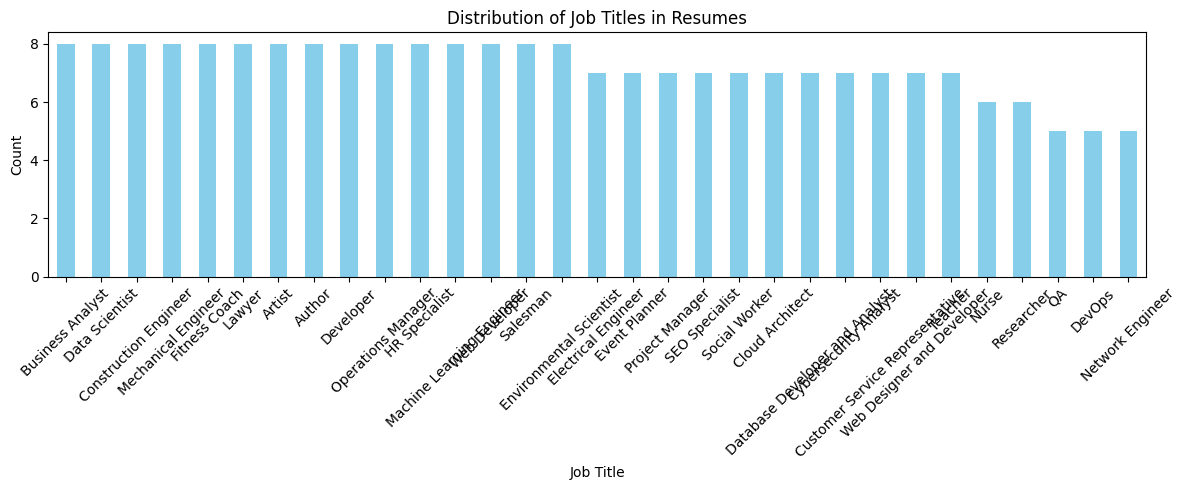

In [24]:
plt.figure(figsize=(12, 5))
df_resume['job_title'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Titles in Resumes')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

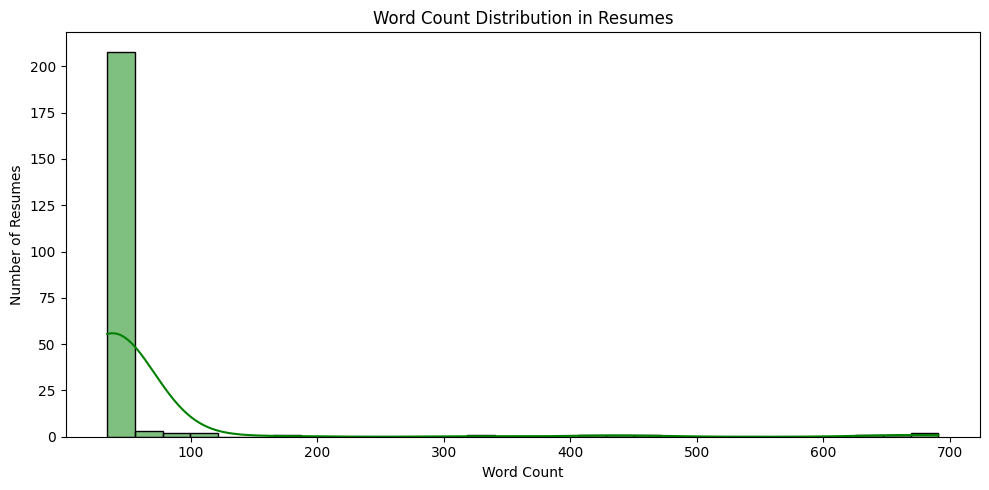

In [25]:
df_resume['resume_word_count'] = df_resume['resume'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df_resume['resume_word_count'], bins=30, kde=True, color='green')
plt.title('Word Count Distribution in Resumes')
plt.xlabel('Word Count')
plt.ylabel('Number of Resumes')
plt.tight_layout()
plt.show()

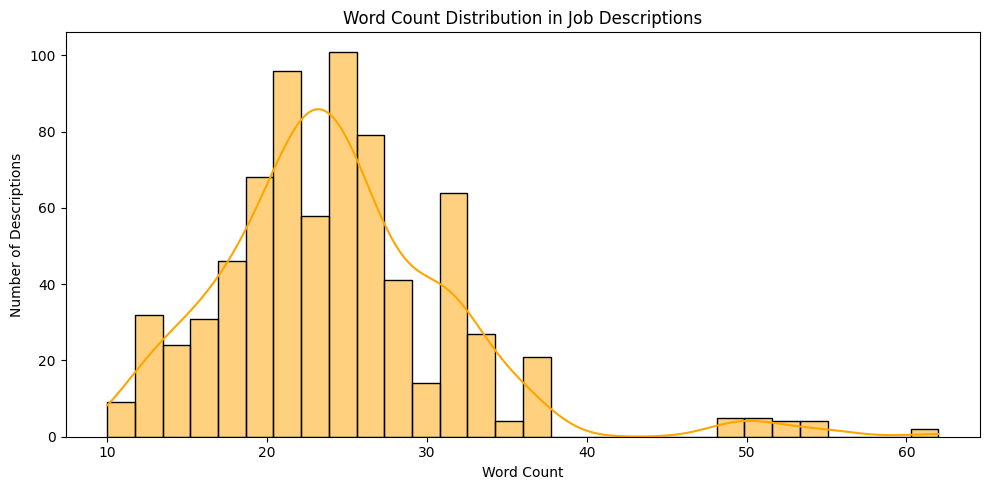

In [26]:
df_jobs['description_word_count'] = df_jobs['Job Description'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df_jobs['description_word_count'], bins=30, kde=True, color='orange')
plt.title('Word Count Distribution in Job Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Number of Descriptions')
plt.tight_layout()
plt.show()

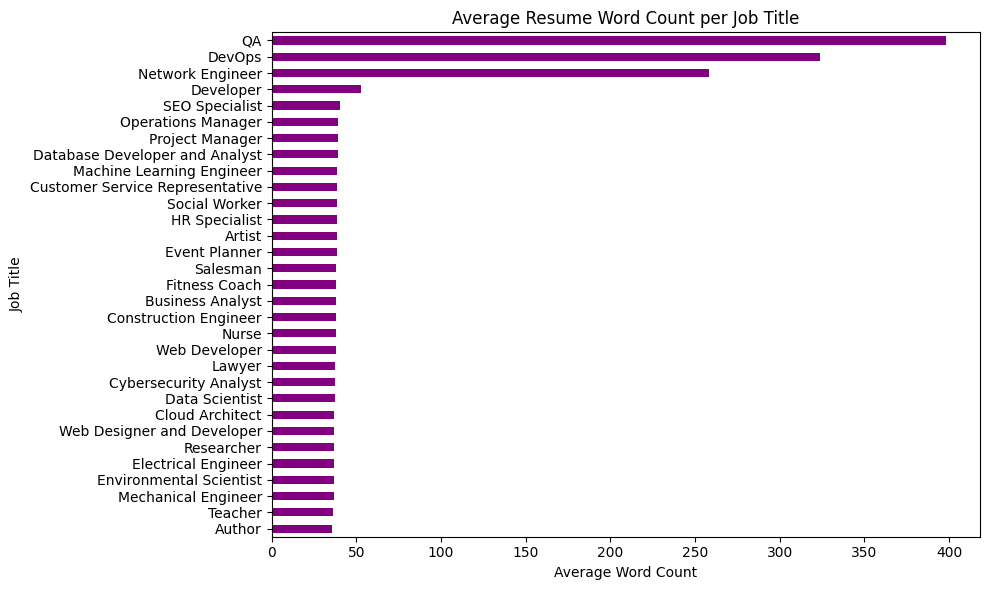

In [27]:
avg_words_per_job = df_resume.groupby('job_title')['resume_word_count'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_words_per_job.plot(kind='barh', color='purple')
plt.title('Average Resume Word Count per Job Title')
plt.xlabel('Average Word Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

In [28]:
longest_resume = df_resume.loc[df_resume['resume_word_count'].idxmax()]
shortest_resume = df_resume.loc[df_resume['resume_word_count'].idxmin()]
print("\nLongest Resume Sample:\n", longest_resume['resume'][:1000], "...\n")
print("\nShortest Resume Sample:\n", shortest_resume['resume'])


Longest Resume Sample:
 Skills VISA B1-VISA (USA) Onsite Visits to Sweden & US (Seattle) Education Details 
January 2013 Post Graduate Diploma Information Technology Pune, Maharashtra Symbiosis Institute
January 2007 Bachelor of Engineering Electronics and Telecommunications Pune, Maharashtra Pune University
Cloud Operations Architect (DevOps) 

Cloud Operations Architect (DevOps) - DevOps
Skill Details 
Cloud Computing- Exprience - 48 months
Shell Scripting- Exprience - 96 months
Python- Exprience - 6 months
Automation- Exprience - 72 months
Solution Architect- Exprience - Less than 1 year months
Azure- Exprience - Less than 1 year months
AWS- Exprience - Less than 1 year monthsCompany Details 
company - DevOps
description - Type: DevOps Engineer.
Platform: AWS Cloud, Azure Cloud.
Services: AWS EC2, RDS, CloudFormation Template, Lambda, Dynamo DB,		Cloud Watch, Auto-scaling, Elastic Bean stalk, Appdynamics.

Here I manage Tibco Spotfire enterprise & Cloud Product support. Being the o

C:\Users\iliya_pc\AppData\Local\Temp\ipykernel_20436\1580238901.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


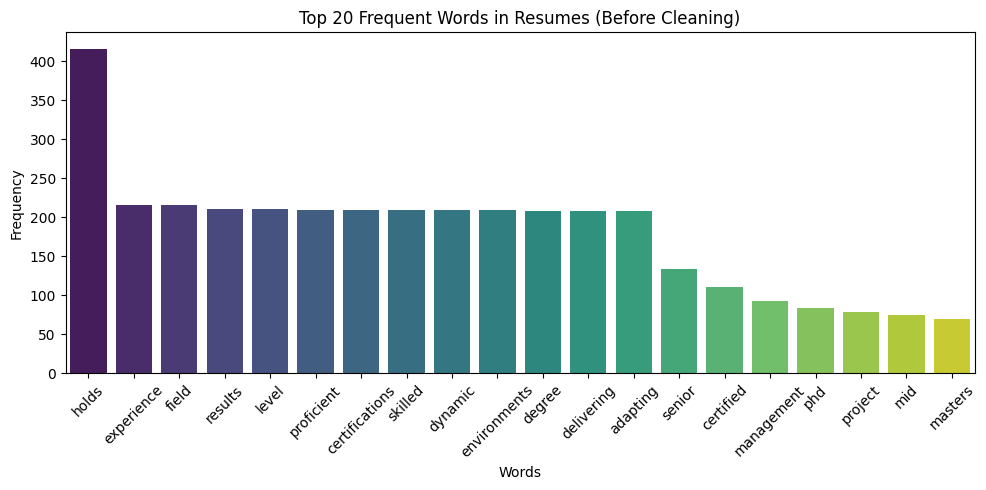

In [29]:
from collections import Counter

all_words = ' '.join(df_resume['clean_resume']).lower()
all_words = re.sub(r'[^a-zA-Z\s]', ' ', all_words)
word_list = all_words.split()
word_freq = Counter(word_list)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.title('Top 20 Frequent Words in Resumes (Before Cleaning)')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [30]:
X = df_resume_clean['clean_resume']
y = df_resume_clean['job_title']

vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y_encoded, test_size=0.2, random_state=42)

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model accuracy : ", accuracy_score(y_test, y_pred))
print("Classification report : ", classification_report(y_test, y_pred))

Model accuracy :  0.8666666666666667
Classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       0.50      1.00      0.67         1
          18       

e:\Python-Repo\Part\cangrow2-final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python-Repo\Part\cangrow2-final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python-Repo\Part\cangrow2-final\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\

In [32]:
def get_top_keywords(texts, top_n=30):
    tfidf = TfidfVectorizer(max_features=5000)
    tfidf_matrix = tfidf.fit_transform(texts)
    scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    words = tfidf.get_feature_names_out()
    top_idx = scores.argsort()[::-1][:top_n]
    return [words[i] for i in top_idx]


def predict_job_and_missing_skills_v2(resume_text):
    cleaned = resume_text.lower()
    cleaned = re.sub(r'[^a-zA-Z\s]', ' ', cleaned)
    tokens = tokenizer.tokenize(cleaned)
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    vect = vectorizer.transform([cleaned_text])
    pred_label = model.predict(vect)[0]
    job_title = label_encoder.inverse_transform([pred_label])[0]

    job_descs = df_jobs[df_jobs['Job Title'].str.lower().str.contains(job_title.lower())]
    if job_descs.empty:
        return job_title, []

    top_keywords = get_top_keywords(job_descs['clean_description'], top_n=50)
    resume_words = set(tokens)
    missing_skills = [word for word in top_keywords if word not in resume_words]
    return job_title, missing_skills[:20]

In [33]:
model_bundle = {
    'model': model,
    'vectorizer': vectorizer,
    'label_encoder': label_encoder,
    'stop_words': stop_words,
    'tokenizer': tokenizer,
    'df_jobs': df_jobs
}

joblib.dump(model_bundle, '../Model/model_resume.pkl')


['../Model/model_resume.pkl']

In [34]:
resume_input = """
Sara Ahmadi  
Vanak St., Tehran, Iran | +989123456789 | sara.ahmadi.dev@gmail.com | github.com/saraahmadi | linkedin.com/in/saraahmadi

About Me  
Creative and detail-oriented Web Developer with 3+ years of experience designing, developing, and managing responsive websites and web applications. Skilled in front-end and back-end technologies, with a passion for clean code and user-focused design.

Experience  
Front-End Developer | Tapsell Technologies | Jul 2021 – Present  
- Developed and maintained responsive websites using React.js, Tailwind CSS, and TypeScript.  
- Improved load times by 30% through performance optimization and lazy loading techniques.  
- Collaborated with UI/UX designers and back-end developers to implement interactive features.

Web Developer Intern | CafeBazaar | Jan 2020 – Jun 2021  
- Assisted in developing internal tools using Node.js and Express.  
- Contributed to the migration of legacy code to modern JavaScript standards.  
- Created reusable React components to speed up future development.

Education  
B.Sc. in Computer Engineering | Sharif University of Technology | 2016 – 2020

Skills  
- Front-End: HTML5, CSS3, JavaScript (ES6+), React, Tailwind CSS, Next.js  
- Back-End: Node.js, Express.js, MongoDB  
- Tools: Git, Webpack, Figma, VS Code  
- Testing: Jest, Cypress  
- Deployment: Vercel, Netlify

Projects  
- Personal Portfolio: Designed and deployed a mobile-friendly developer portfolio using Next.js and Tailwind.  
- Task Manager App: A full-stack to-do app with authentication and CRUD features (MERN stack).

Languages  
Persian (Native), English (Professional)
"""



predicted_job, suggested_skills = predict_job_and_missing_skills_v2(resume_input)

print("Suggested job :", predicted_job)
print("Suggested skills to learn:")
print(suggested_skills)


Suggested job : Web Developer
Suggested skills to learn:
['frontend', 'backend', 'interfaces', 'appealing', 'seamless', 'experiences', 'users', 'visually', 'collaborate', 'create', 'ensuring', 'work', 'solutions', 'infrastructure', 'providing', 'server', 'databases', 'creating', 'aspects', 'application']
